# Elements logiciels pour le traitement des données en grande dimension

In [1]:
%matplotlib inline

## Installation de pyspark

In [2]:
import findspark
sparkHome = "C:\Dev\Spark\spark-2.2.0-bin-hadoop2.7"
findspark.init(sparkHome)

### Petit essai pour calculer PI

In [3]:
def printSpendTime (startTime) :
    spendTime = time.time() - startTime
    m, s = divmod(spendTime, 60)
    h, m = divmod(m, 60)
    print("--------------------------------------------------")
    print ("-----   Temps écoulé : %dh%02dm%02ds" % (h, m, s))
    print("--------------------------------------------------")
    return

In [4]:
import pyspark
import random
import time

startTime = time.time()

sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000

def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1

count = sc.parallelize(range(0, num_samples)).filter(inside).count()

pi = 4 * count / num_samples
print(pi)

sc.stop()

printSpendTime(startTime)

3.14173052
--------------------------------------------------
-----   Temps écoulé : 0h00m28s
--------------------------------------------------


## Arbre k-d classique

### Création d'un jeu de données

In [5]:
import numpy as np
import pandas

n = 10
data = pandas.DataFrame(np.random.rand(n,2)*100,  columns = ['X', 'Y'])
data

,X,Y
0,36.347296,42.509107
1,51.248773,84.485340
2,29.997797,95.315386
3,4.660241,35.085066
4,27.622931,1.886550
5,54.620039,60.477298
6,90.879981,27.776310
7,65.732405,86.641572
8,1.096119,31.667776
9,13.750361,39.403186


In [6]:
data.index.values.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

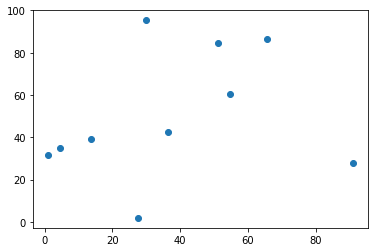

In [7]:
import matplotlib.pyplot as plt

plt.plot(data[['X']], data[['Y']], 'o')

### Arbre k-d sur ce jeu de données

In [8]:
class Tree(object):
    def __init__(self):
        self.left = None
        self.right = None
        self.data = None

In [9]:
print(list(data.columns.values))

['X', 'Y']


In [10]:
def test (col) :
    # return(len(data[[col]]))
    return(data[[col]])
res = map(test, list(data.columns.values))
#len(res)
map_output = map(lambda x: x*2, [1, 2, 3, 4])
list(map_output)

[2, 4, 6, 8]

In [11]:
def arbreKD (data) :
    for col in list(data.columns.values):
        print(col)
        
# arbreKD(data)

In [12]:
print(type(data['X']))
print(type(data[['X']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
print(data[['X']])
print(data.sort_values(by=['X'])[['X']])
print(data[['X']])

           X
0  36.347296
1  51.248773
2  29.997797
3   4.660241
4  27.622931
5  54.620039
6  90.879981
7  65.732405
8   1.096119
9  13.750361
           X
8   1.096119
3   4.660241
9  13.750361
4  27.622931
2  29.997797
0  36.347296
1  51.248773
5  54.620039
7  65.732405
6  90.879981
           X
0  36.347296
1  51.248773
2  29.997797
3   4.660241
4  27.622931
5  54.620039
6  90.879981
7  65.732405
8   1.096119
9  13.750361
